
# CDFs and Inverse Transform Sampling

This notebook illustrates:

- Cumulative distribution functions (CDFs)
- Sampling via the inverse CDF (quantile transform)

We focus on the **Exponential** distribution as a simple example.


In [1]:
import os
os.makedirs("figs", exist_ok=True)

In [2]:

import numpy as np
import math
import matplotlib.pyplot as plt

rng = np.random.default_rng(12345)



## 1. Exponential Distribution

Let \(X \sim \mathrm{Exp}(\lambda)\) with PDF

\[
p(x) = \\lambda e^{-\\lambda x}, \\quad x \\ge 0,
\]

and CDF

\[
F(x) = 1 - e^{-\\lambda x}, \\quad x \\ge 0.
\]

The inverse CDF is

\[
F^{-1}(u) = -\\frac{1}{\\lambda} \\log(1-u), \\quad u \\in (0,1).
\]

This gives a simple way to generate exponential random variables from
uniform samples \(U \sim \\mathcal{U}(0,1)\).


In [3]:

def exp_pdf(x, lam):
    return lam * np.exp(-lam * x) * (x >= 0.0)

def exp_cdf(x, lam):
    return (1.0 - np.exp(-lam * x)) * (x >= 0.0)

def exp_inverse_cdf(u, lam):
    return - (1.0 / lam) * np.log(1.0 - u)


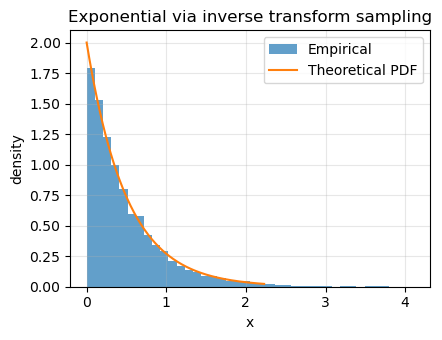

In [4]:

lam = 2.0
N = 10000

U = rng.random(N)
X_exp = exp_inverse_cdf(U, lam)

xs = np.linspace(0, np.percentile(X_exp, 99.0), 200)
pdf_vals = exp_pdf(xs, lam)

plt.figure(figsize=(4.5, 3.5))
plt.hist(X_exp, bins=40, density=True, alpha=0.7, label="Empirical")
plt.plot(xs, pdf_vals, label="Theoretical PDF")
plt.xlabel("x")
plt.ylabel("density")
plt.title("Exponential via inverse transform sampling")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/inverse_cdf_fig_1.png", dpi=300, bbox_inches="tight")
plt.show()


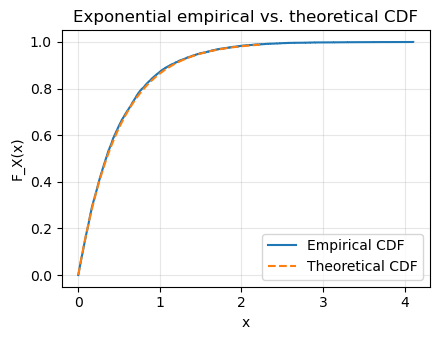

In [5]:

sorted_x = np.sort(X_exp)
cdf_emp = np.arange(1, N + 1) / N
xs_cdf = np.linspace(0, np.percentile(X_exp, 99.0), 200)
cdf_th = exp_cdf(xs_cdf, lam)

plt.figure(figsize=(4.5, 3.5))
plt.step(sorted_x, cdf_emp, where="post", label="Empirical CDF")
plt.plot(xs_cdf, cdf_th, linestyle="--", label="Theoretical CDF")
plt.xlabel("x")
plt.ylabel("F_X(x)")
plt.title("Exponential empirical vs. theoretical CDF")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("figs/inverse_cdf_fig_2.png", dpi=300, bbox_inches="tight")
plt.show()



## 2. Discussion

The inverse-CDF method shows how to transform simple uniform noise into samples
from a target distribution.  This idea underlies many sampling techniques and
connects directly to normalizing flows and diffusion models later in the book.
